This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [17]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7118 - loss: 0.9944 - val_accuracy: 0.8940 - val_loss: 0.3640
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9150 - loss: 0.2715 - val_accuracy: 0.9466 - val_loss: 0.1789
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9489 - loss: 0.1644 - val_accuracy: 0.9541 - val_loss: 0.1537
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9629 - loss: 0.1160 - val_accuracy: 0.9639 - val_loss: 0.1211
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 0.0844 - val_accuracy: 0.9582 - val_loss: 0.1455
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9811 - loss: 0.0618 - val_accuracy: 0.9355 - val_loss: 0.2051
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0466 - val_accuracy: 0.9672 - val_loss: 0.1135
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9917 - loss: 0.0283 - val_accuracy: 0.

**Plotting a validation accuracy comparison**

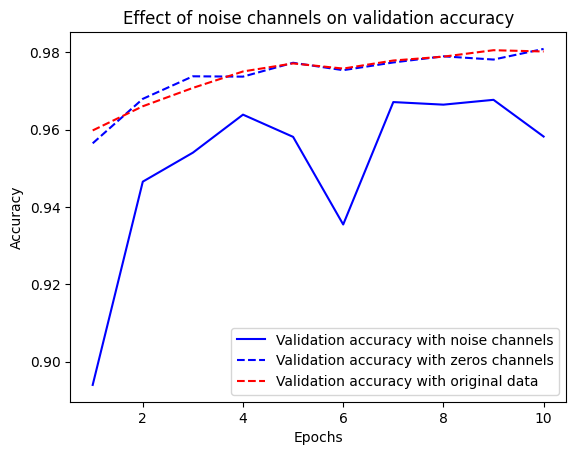

In [20]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc, "r--",
         label="Validation accuracy with original data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [22]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=100,
          verbose=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 - 2s - 7ms/step - accuracy: 0.1053 - loss: 2.3150 - val_accuracy: 0.1041 - val_loss: 2.3056
Epoch 2/100
375/375 - 2s - 5ms/step - accuracy: 0.1181 - loss: 2.2993 - val_accuracy: 0.1009 - val_loss: 2.3097
Epoch 3/100
375/375 - 1s - 3ms/step - accuracy: 0.1243 - loss: 2.2934 - val_accuracy: 0.1026 - val_loss: 2.3155
Epoch 4/100
375/375 - 1s - 3ms/step - accuracy: 0.1364 - loss: 2.2813 - val_accuracy: 0.0993 - val_loss: 2.3213
Epoch 5/100
375/375 - 1s - 3ms/step - accuracy: 0.1480 - loss: 2.2662 - val_accuracy: 0.1011 - val_loss: 2.3311
Epoch 6/100
375/375 - 1s - 3ms/step - accuracy: 0.1624 - loss: 2.2476 - val_accuracy: 0.0961 - val_loss: 2.3518
Epoch 7/100
375/375 - 2s - 7ms/step - accuracy: 0.1779 - loss: 2.2245 - val_accuracy: 0.1023 - val_loss: 2.3562
Epoch 8/100
375/375 - 1s - 3ms/step - accuracy: 0.1924 - loss: 2.1983 - val_accuracy: 0.1018 - val_loss: 2.3792
Epoch 9/100
375/375 - 1s - 3ms/step - accuracy: 0.2069 - loss: 2.1693 - val_accuracy: 0.0994 - val_loss:

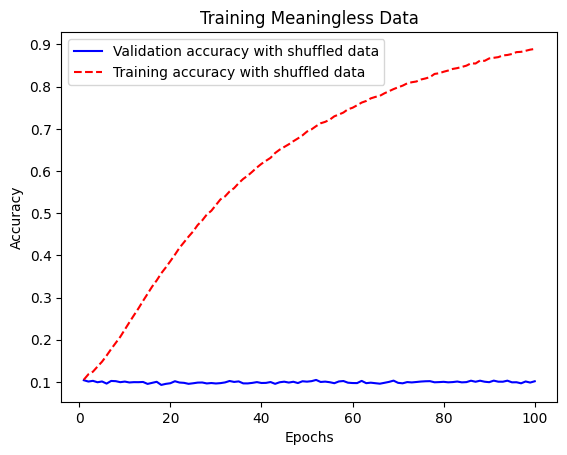

In [24]:
val_acc_with_shuffled_data = history.history["val_accuracy"]
train_acc_with_shuffled_data = history.history["accuracy"]
epochs = range(1, 101)
plt.plot(epochs, val_acc_with_shuffled_data, "b-",
         label="Validation accuracy with shuffled data")
plt.plot(epochs, train_acc_with_shuffled_data, "r--",
         label="Training accuracy with shuffled data")
plt.title("Training Meaningless Data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # very high learning rate
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2) # accuracy decreases or doesn't improve

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4379 - loss: 3580.0405 - val_accuracy: 0.2061 - val_loss: 2.6611
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2072 - loss: 2.9606 - val_accuracy: 0.2039 - val_loss: 2.1774
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2450 - loss: 2.7506 - val_accuracy: 0.2075 - val_loss: 2.1237
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2057 - loss: 2.4749 - val_accuracy: 0.1980 - val_loss: 2.2116
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1992 - loss: 2.3486 - val_accuracy: 0.2024 - val_loss: 2.2509
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2209 - loss: 2.5279 - val_accuracy: 0.2412 - val_loss: 2.0591
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2298 - loss: 2.5067 - val_accuracy: 0.2557 - val_loss: 1.9459
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2318 - loss: 2.2779 - val_accuracy:

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), # appropriate learning rate
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2) # much better accuracy & loss

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8330 - loss: 0.8000 - val_accuracy: 0.9428 - val_loss: 0.2035
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9621 - loss: 0.1274 - val_accuracy: 0.9626 - val_loss: 0.1479
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9735 - loss: 0.0965 - val_accuracy: 0.9639 - val_loss: 0.1660
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9811 - loss: 0.0698 - val_accuracy: 0.9729 - val_loss: 0.1461
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9825 - loss: 0.0680 - val_accuracy: 0.9711 - val_loss: 0.1810
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9860 - loss: 0.0577 - val_accuracy: 0.9754 - val_loss: 0.1582
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9878 - loss: 0.0486 - val_accuracy: 0.9730 - val_loss: 0.1763
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9901 - loss: 0.0416 - val_accuracy: 0.

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7425 - loss: 1.0419 - val_accuracy: 0.9024 - val_loss: 0.3605
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9010 - loss: 0.3645 - val_accuracy: 0.9130 - val_loss: 0.3099
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9100 - loss: 0.3197 - val_accuracy: 0.9192 - val_loss: 0.2929
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9125 - loss: 0.3128 - val_accuracy: 0.9233 - val_loss: 0.2824
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9193 - loss: 0.2860 - val_accuracy: 0.9233 - val_loss: 0.2785
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9202 - loss: 0.2850 - val_accuracy: 0.9249 - val_loss: 0.2746
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9242 - loss: 0.2714 - val_accuracy: 0.9244 - val_loss: 0.2737
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9239 - loss: 0.2710 - val_accuracy: 0.

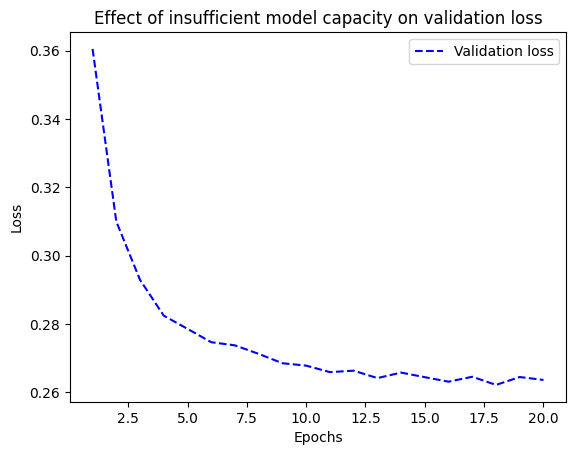

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect Of Insufficient Model Capacity On Validation Loss(Low Capacity)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8231 - loss: 0.6252 - val_accuracy: 0.9491 - val_loss: 0.1789
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9494 - loss: 0.1681 - val_accuracy: 0.9637 - val_loss: 0.1274
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9661 - loss: 0.1155 - val_accuracy: 0.9679 - val_loss: 0.1090
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9732 - loss: 0.0873 - val_accuracy: 0.9698 - val_loss: 0.0998
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9790 - loss: 0.0719 - val_accuracy: 0.9678 - val_loss: 0.1062
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9832 - loss: 0.0567 - val_accuracy: 0.9713 - val_loss: 0.0960
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9857 - loss: 0.0468 - val_accuracy: 0.9739 - val_loss: 0.0924
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9887 - loss: 0.0370 - val_accuracy: 0.

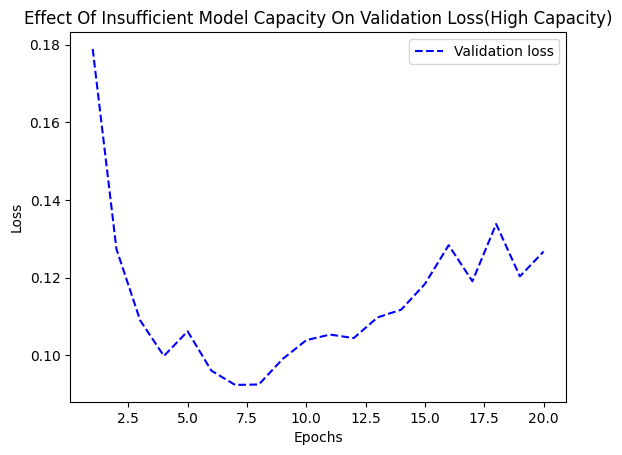

In [25]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect Of Insufficient Model Capacity On Validation Loss(High Capacity)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [29]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6806 - loss: 0.6076 - val_accuracy: 0.8657 - val_loss: 0.4077
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8915 - loss: 0.3592 - val_accuracy: 0.8784 - val_loss: 0.3250
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9180 - loss: 0.2609 - val_accuracy: 0.8885 - val_loss: 0.2922
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9365 - loss: 0.2042 - val_accuracy: 0.8917 - val_loss: 0.2755
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9498 - loss: 0.1684 - val_accuracy: 0.8891 - val_loss: 0.2790
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9509 - loss: 0.1550 - val_accuracy: 0.8766 - val_loss: 0.3107
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9593 - loss: 0.1351 - val_accuracy: 0.8783 - val_loss: 0.3110
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9685 - loss: 0.1127 - val_accuracy: 0.8855 - v

**Version of the model with lower capacity**

In [30]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.6927 - loss: 0.6518 - val_accuracy: 0.8445 - val_loss: 0.5554
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8612 - loss: 0.5198 - val_accuracy: 0.8430 - val_loss: 0.4726
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8887 - loss: 0.4355 - val_accuracy: 0.8698 - val_loss: 0.4082
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9013 - loss: 0.3653 - val_accuracy: 0.8808 - val_loss: 0.3662
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9139 - loss: 0.3146 - val_accuracy: 0.8820 - val_loss: 0.3369
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9207 - loss: 0.2736 - val_accuracy: 0.8868 - val_loss: 0.3100
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9261 - loss: 0.2467 - val_accuracy: 0.8891 - val_loss: 0.2941
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9316 - loss: 0.2221 - val_accuracy: 0.8914 - 

**Version of the model with higher capacity**

In [31]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.6264 - loss: 0.6477 - val_accuracy: 0.8619 - val_loss: 0.3514
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8615 - loss: 0.3342 - val_accuracy: 0.8603 - val_loss: 0.3402
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8877 - loss: 0.2785 - val_accuracy: 0.8774 - val_loss: 0.2981
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9320 - loss: 0.1768 - val_accuracy: 0.8882 - val_loss: 0.2872
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9437 - loss: 0.1467 - val_accuracy: 0.8895 - val_loss: 0.2775
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9730 - loss: 0.0885 - val_accuracy: 0.8874 - val_loss: 0.3247
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9756 - loss: 0.0745 - val_accuracy: 0.8855 - val_loss: 0.3648
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9893 - loss: 0.0481 - val_accuracy: 0.8845 - v

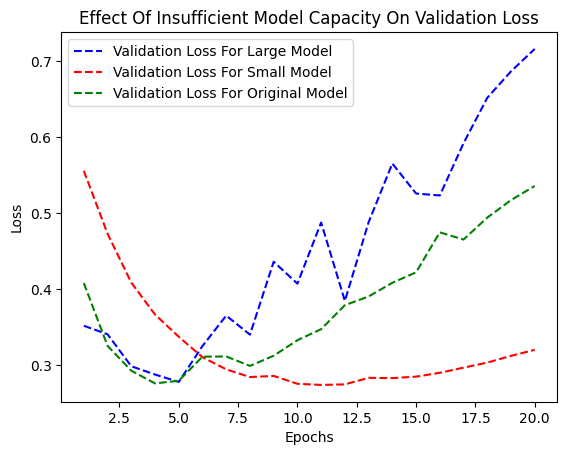

In [35]:
val_loss_larger_model = history_larger_model.history["val_loss"]
val_loss_smaller_model = history_smaller_model.history["val_loss"]
val_loss_original_model = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_larger_model, "b--",
         label="Validation Loss For Large Model")
plt.plot(epochs, val_loss_smaller_model, "r--",
         label="Validation Loss For Small Model")
plt.plot(epochs, val_loss_original_model, "g--",
         label="Validation Loss For Original Model")
plt.title("Effect Of Insufficient Model Capacity On Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.7149 - loss: 0.6746 - val_accuracy: 0.8539 - val_loss: 0.4804
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8955 - loss: 0.4183 - val_accuracy: 0.8852 - val_loss: 0.3907
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9141 - loss: 0.3358 - val_accuracy: 0.8926 - val_loss: 0.3602
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9329 - loss: 0.2888 - val_accuracy: 0.8903 - val_loss: 0.3515
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9384 - loss: 0.2641 - val_accuracy: 0.8807 - val_loss: 0.3650
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9403 - loss: 0.2515 - val_accuracy: 0.8864 - val_loss: 0.3532
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9483 - loss: 0.2366 - val_accuracy: 0.8819 - val_loss: 0.3658
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9538 - loss: 0.2259 - val_accuracy: 0.8747 - v

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.5842 - loss: 0.6658 - val_accuracy: 0.8375 - val_loss: 0.5506
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7303 - loss: 0.5562 - val_accuracy: 0.8702 - val_loss: 0.4527
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7919 - loss: 0.4751 - val_accuracy: 0.8788 - val_loss: 0.3869
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8396 - loss: 0.4218 - val_accuracy: 0.8828 - val_loss: 0.3440
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8571 - loss: 0.3812 - val_accuracy: 0.8859 - val_loss: 0.3175
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8857 - loss: 0.3348 - val_accuracy: 0.8801 - val_loss: 0.2983
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8991 - loss: 0.3067 - val_accuracy: 0.8853 - val_loss: 0.2858
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9174 - loss: 0.2654 - val_accuracy: 0.8848 - 

## Summary